# CLUSTERING ANALYSIS

### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [2]:
import pandas as pd

## Correctly Load Data

### Subtask:
Modify the `pd.read_excel` call to include `header=9` to correctly identify the column headers from the Excel file named 'EastWestAirlines'.


**Reasoning**:
The subtask requires modifying the `pd.read_excel` call to set the `header` parameter to 9 to correctly load the data, as identified in the instructions. This modification will re-read the Excel file with the correct headers.



In [6]:
customer_df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
print("First 5 rows of customer_df:")
print(customer_df.head())
print("\nInformation about customer_df:")
customer_df.info()

First 5 rows of customer_df:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  

Information about customer_

## Handle Missing Values



**Reasoning**:
To identify missing values as per the instruction, I will use the `.isnull().sum()` methods on the `customer_df` DataFrame.



In [7]:
print("Missing values in customer_df:")
print(customer_df.isnull().sum())

Missing values in customer_df:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


## Identify and Remove Outliers


Implement a method, such as the Interquartile Range (IQR) rule, to detect and remove outliers from the numerical features of the dataset to ensure robust clustering results.


**Reasoning**:
To identify and remove outliers using the IQR method, I will first identify the numerical columns (excluding 'ID#'), calculate Q1, Q3, and IQR for each, then define the outlier bounds, and finally filter the DataFrame to remove rows containing outliers, storing the result in a new DataFrame and printing the shapes of both the original and cleaned DataFrames.



In [8]:
import numpy as np

# 1. Identify numerical columns (excluding 'ID#')
numerical_cols = customer_df.select_dtypes(include=np.number).columns.tolist()
if 'ID#' in numerical_cols:
    numerical_cols.remove('ID#')

df_no_outliers = customer_df.copy()

# Store outlier indices for each column
all_outlier_indices = set()

for col in numerical_cols:
    # 2. Calculate Q1 and Q3
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)

    # 3. Calculate IQR
    IQR = Q3 - Q1

    # 4. Determine lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current column
    outlier_indices = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)].index
    all_outlier_indices.update(outlier_indices)

# 5. Filter the DataFrame to remove rows with outliers
df_no_outliers = df_no_outliers.drop(list(all_outlier_indices))

# 6. Print the shape of the original and new DataFrames
print(f"Shape of original customer_df: {customer_df.shape}")
print(f"Shape of df_no_outliers after removing outliers: {df_no_outliers.shape}")

Shape of original customer_df: (3999, 12)
Shape of df_no_outliers after removing outliers: (2875, 12)


## Feature Scaling


Apply a scaling technique, such as StandardScaler, to normalize the features. This is crucial for distance-based clustering algorithms like K-Means and DBSCAN.


**Reasoning**:
As per the instructions, I will first import `StandardScaler`, then create a new DataFrame `df_scaled` by dropping the 'ID#' column, instantiate and fit `StandardScaler` to this DataFrame, transform it, and finally print the first 5 rows to verify the scaling.



In [9]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame df_scaled by dropping the 'ID#' column
df_scaled = df_no_outliers.drop('ID#', axis=1)

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the df_scaled DataFrame and transform the data
df_scaled = scaler.fit_transform(df_scaled)

# Convert the scaled array back to a DataFrame for easier inspection, retaining column names
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.drop('ID#', axis=1).columns)

# Print the first 5 rows of df_scaled to verify the scaling
print("First 5 rows of df_scaled after StandardScaler:")
print(df_scaled.head())

First 5 rows of df_scaled after StandardScaler:
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.438859         0.0  -0.719055        0.0        0.0    -0.783131   
1 -0.647735         0.0  -0.719055        0.0        0.0    -0.780130   
2 -0.128773         0.0  -0.719055        0.0        0.0    -0.494075   
3 -0.752607         0.0  -0.719055        0.0        0.0    -0.759268   
4 -0.714019         0.0  -0.719055        0.0        0.0    -0.795867   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.081732          -0.378837        -0.409708           1.503693   
1    -0.952735          -0.378837        -0.409708           1.488035   
2    -0.694742          -0.378837        -0.409708           1.520330   
3    -1.081732          -0.378837        -0.409708           1.480206   
4    -1.210728          -0.378837        -0.409708           1.475312   

     Award?  
0 -0.623072  
1 -0.623072  
2 -0.623072  
3 -0.623072  
4 -0

## Exploratory Data Analysis (EDA) - Histograms


histograms for all relevant features to visualize their distributions and gain insights into the data's spread and central tendency.


**Reasoning**:
To visualize the distribution of each feature, I will first import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported: matplotlib.pyplot as plt, seaborn as sns")

Libraries imported: matplotlib.pyplot as plt, seaborn as sns


**Reasoning**:
To visualize the distribution of each feature, I will iterate through the columns of `df_scaled` and generate a histogram for each using `sns.histplot`, ensuring each plot has a title and is displayed individually.



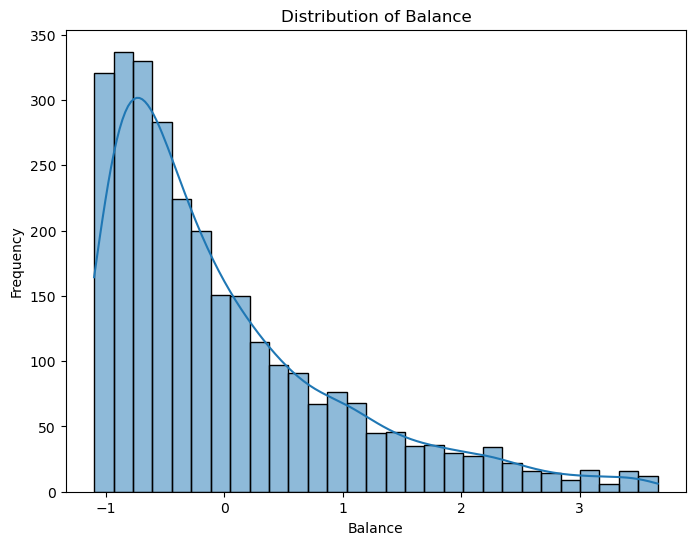

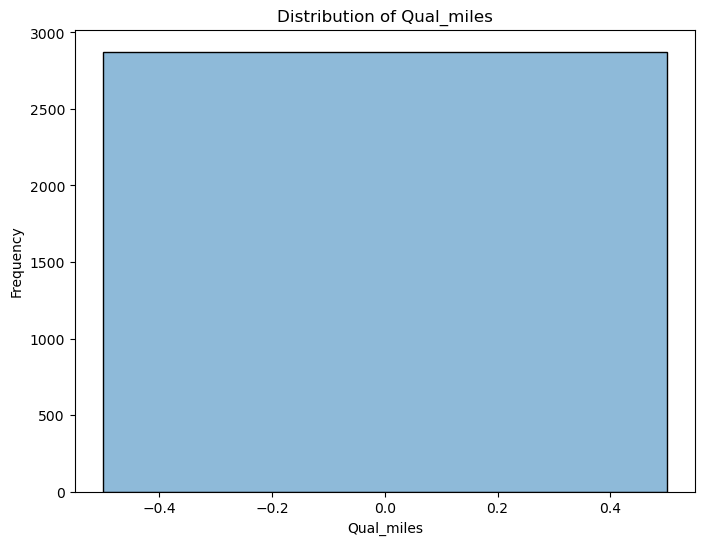

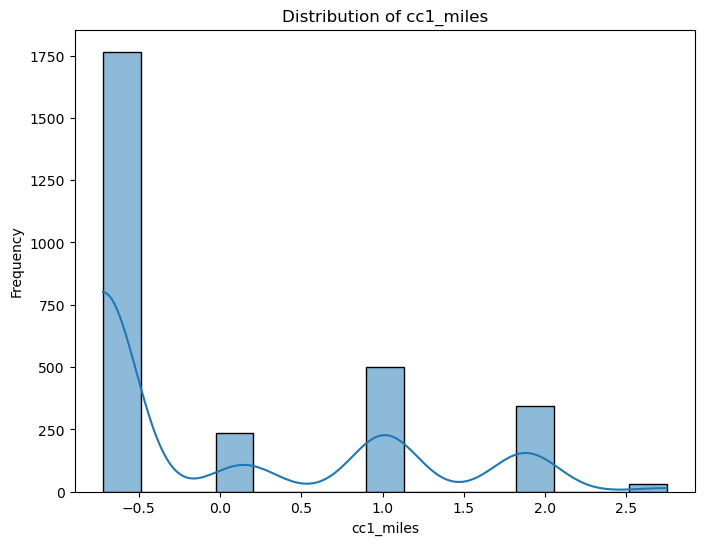

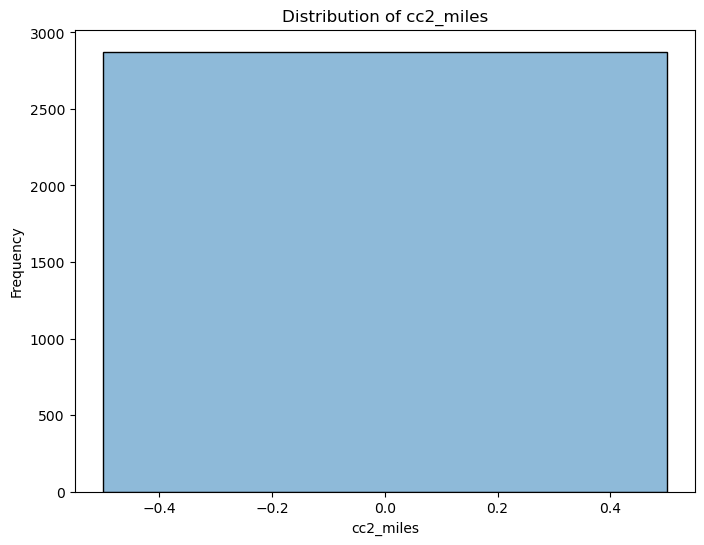

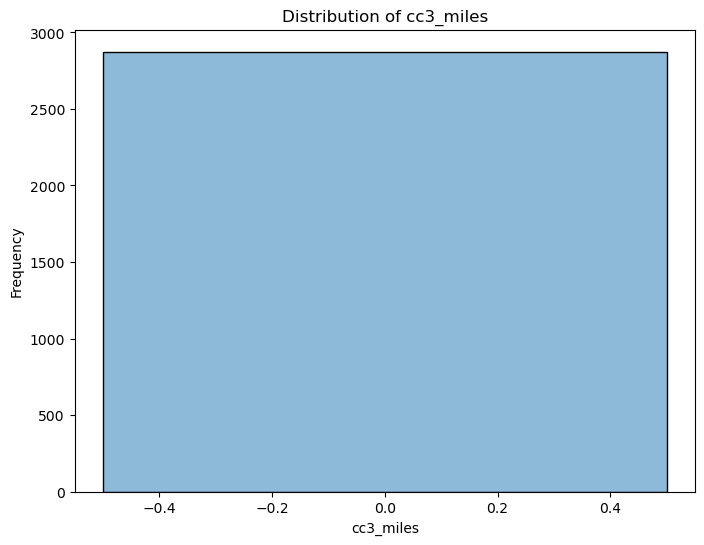

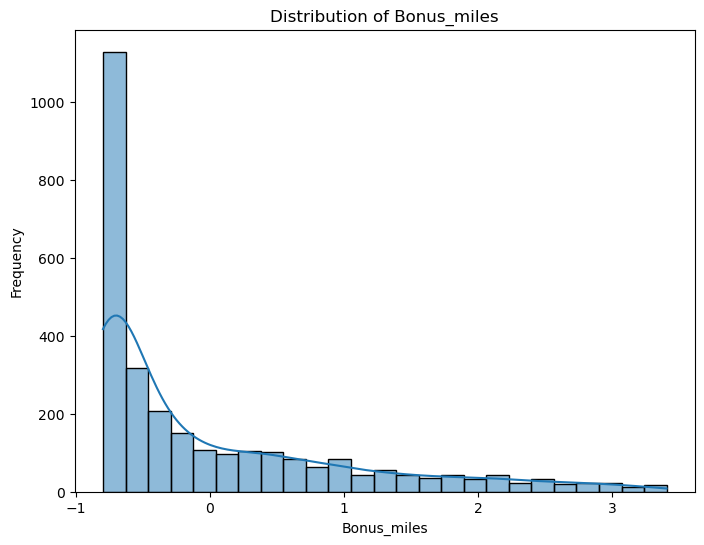

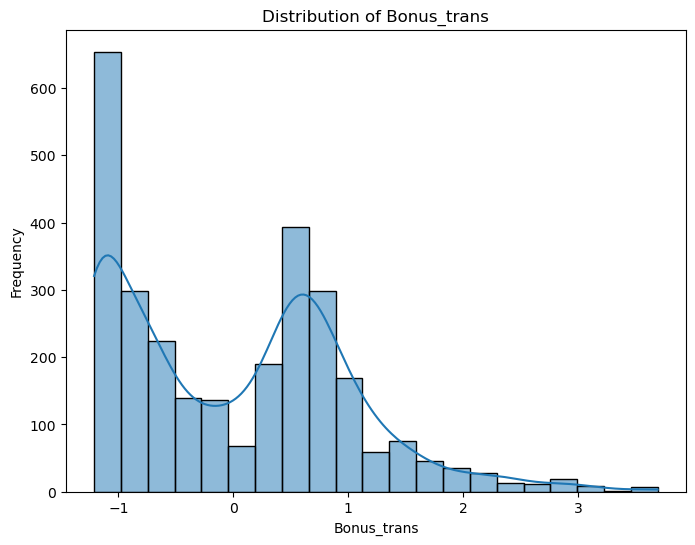

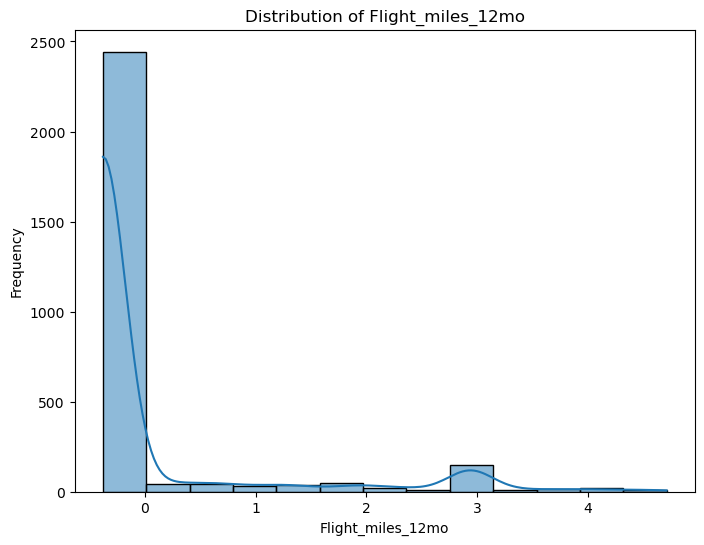

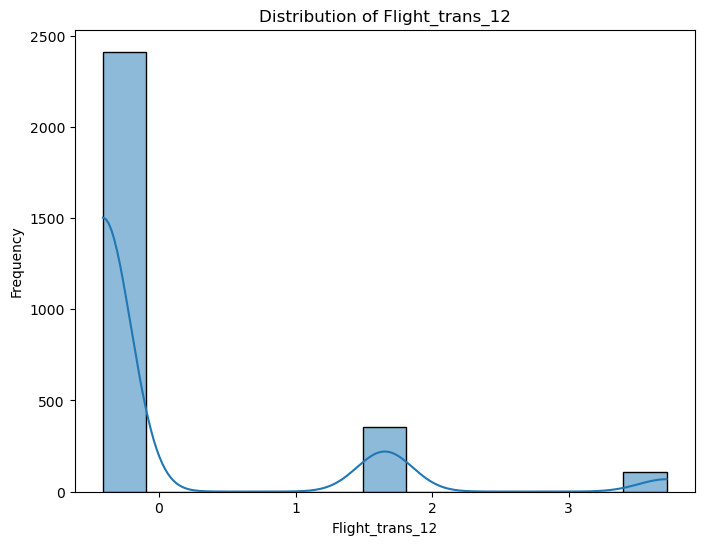

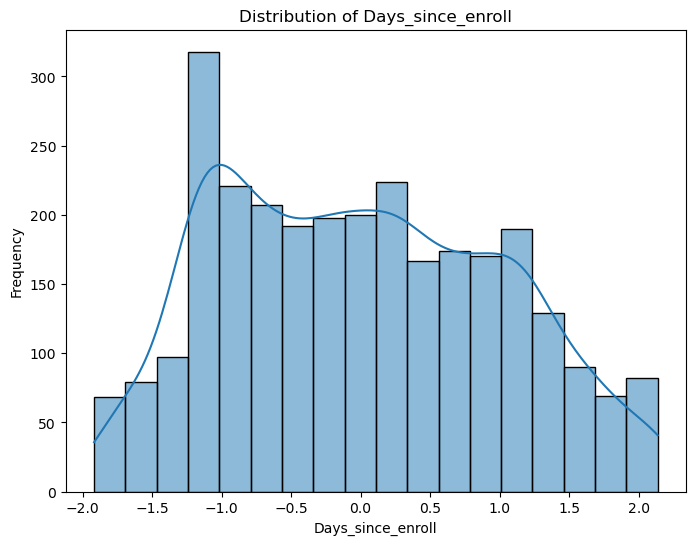

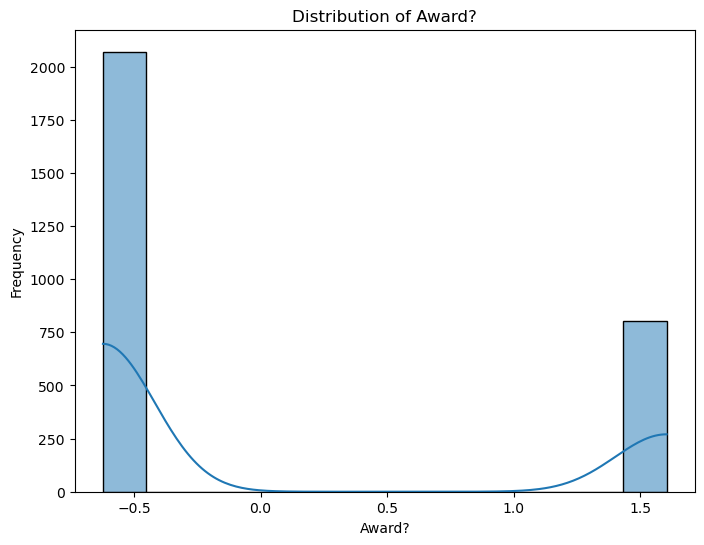

In [11]:
for column in df_scaled.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_scaled[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Exploratory Data Analysis (EDA) - Boxplots

### Subtask:
Generate boxplots for all relevant features to visualize their distributions, identify potential outliers, and understand the data's spread.


**Reasoning**:
To visualize the distributions and identify potential outliers for each feature, I will iterate through the columns of the `df_scaled` DataFrame and generate a boxplot for each using `seaborn.boxplot()`, ensuring each plot has a title and is displayed individually.



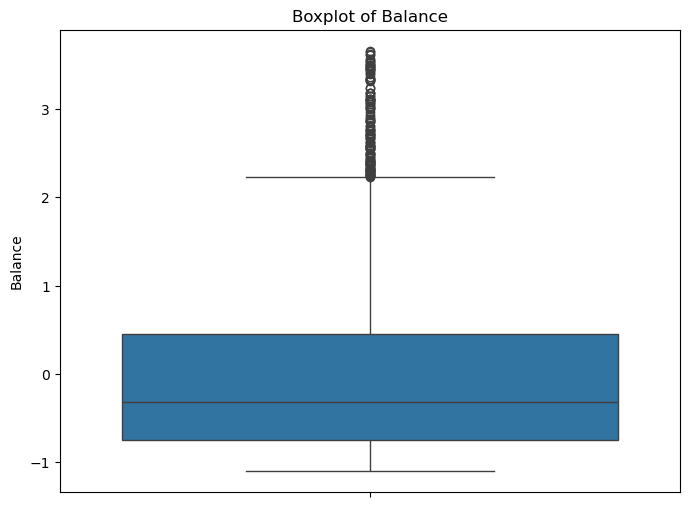

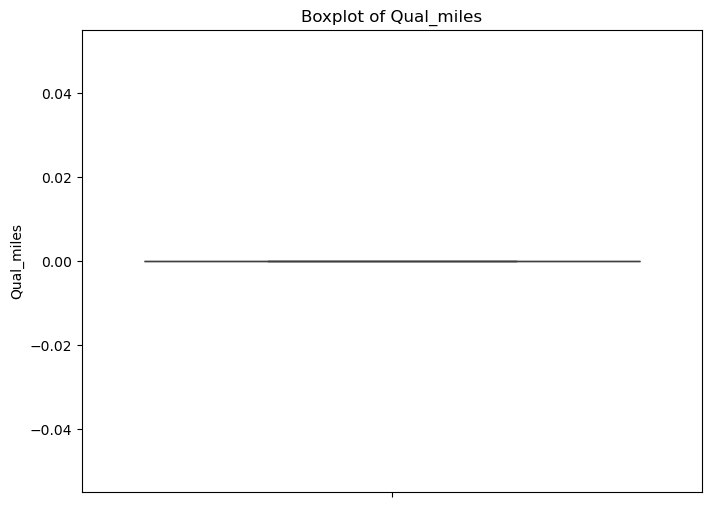

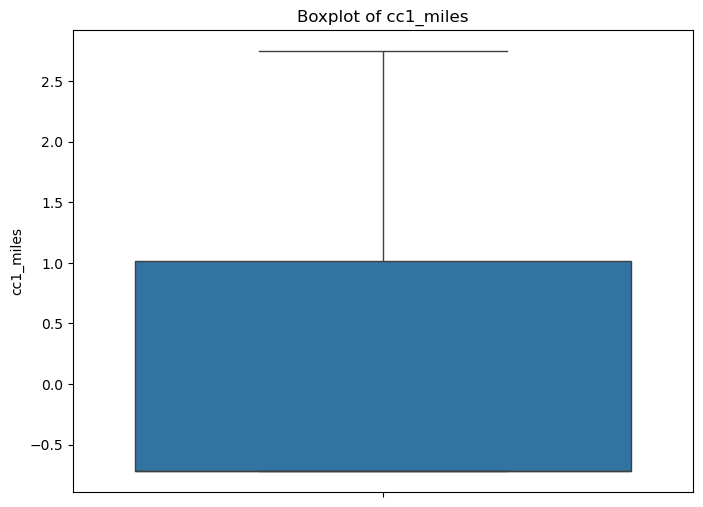

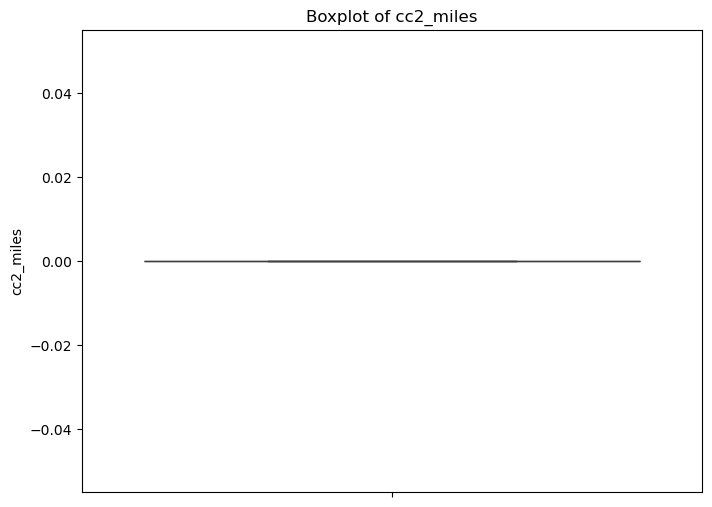

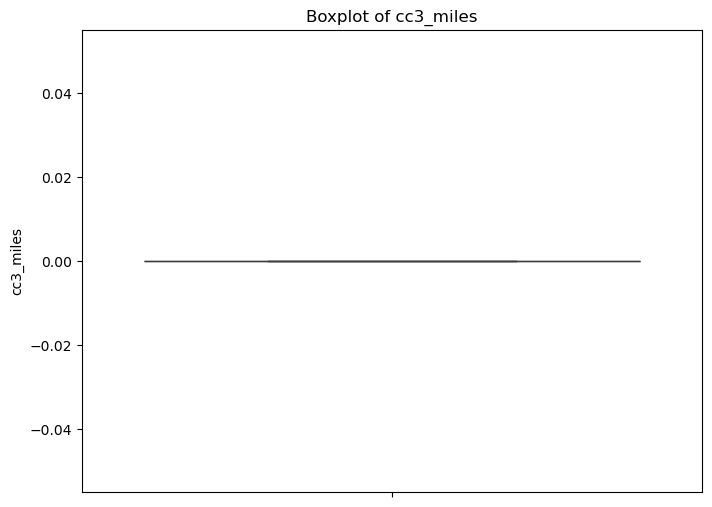

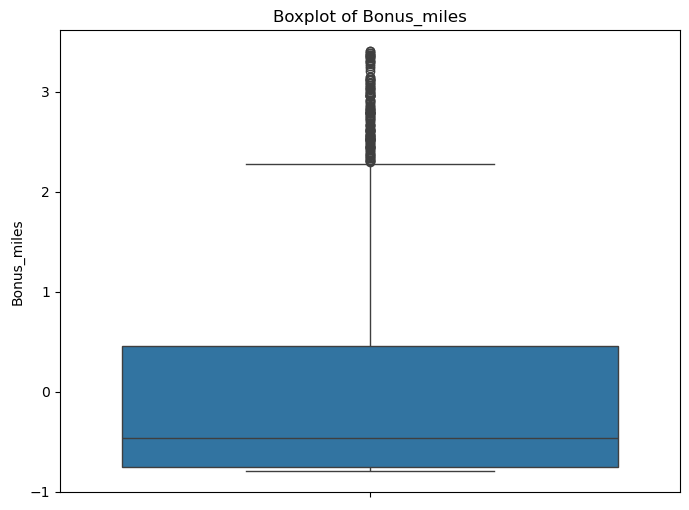

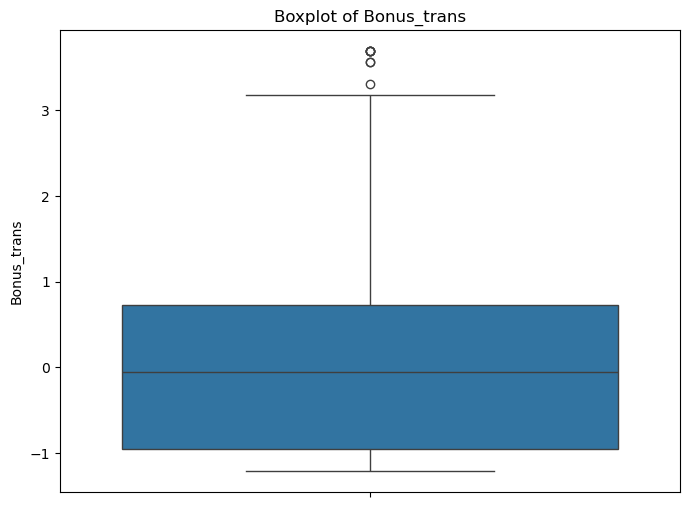

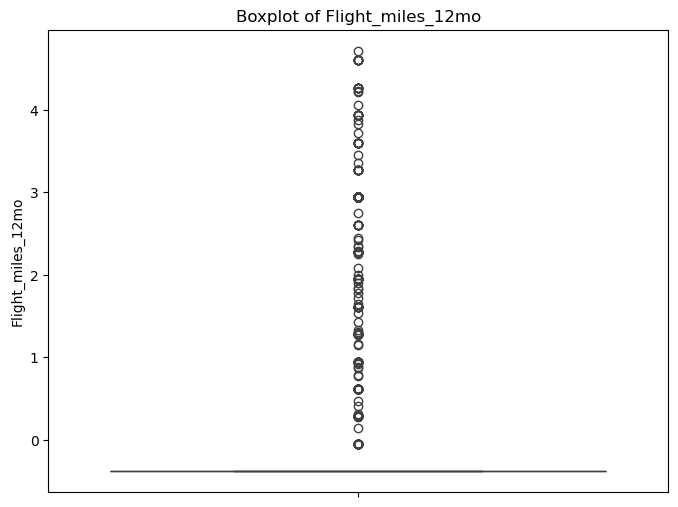

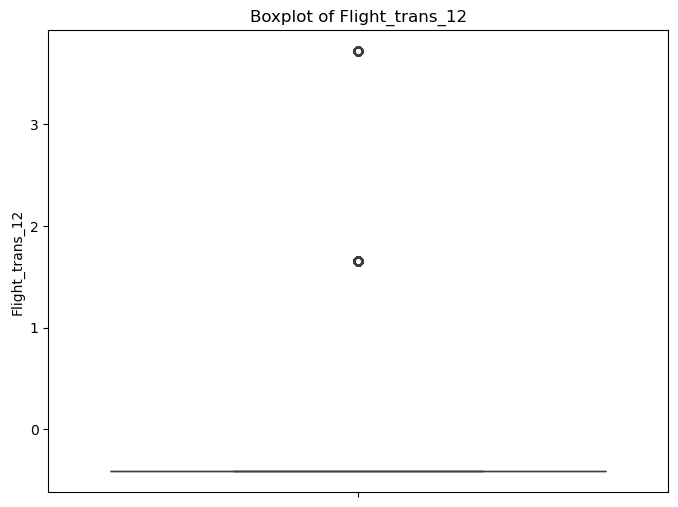

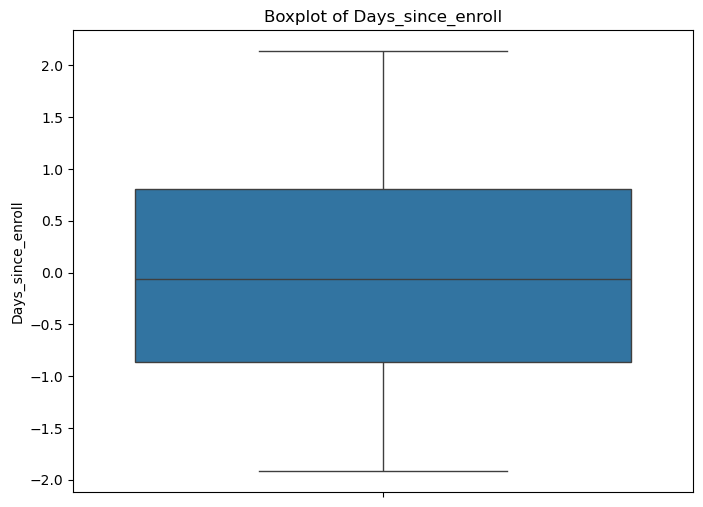

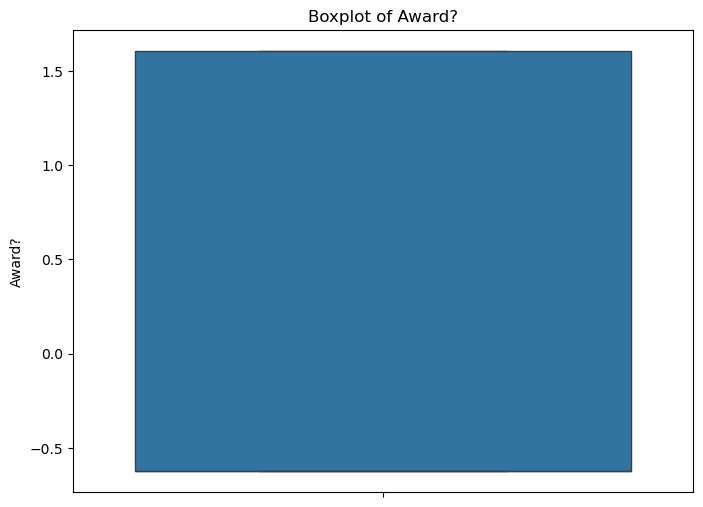

In [12]:
for column in df_scaled.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

## Determine Optimal K for K-Means (Elbow Method)

### Subtask:
Utilize the Elbow method to determine the optimal number of clusters (K) for the K-Means algorithm by plotting the Sum of Squared Errors (SSE) against different K values.


**Reasoning**:
To implement the Elbow method as per the instructions, I need to first import the `KMeans` class from `sklearn.cluster`.



In [13]:
from sklearn.cluster import KMeans
print("KMeans imported successfully.")

KMeans imported successfully.


**Reasoning**:
To implement the Elbow method, I will create a list to store inertia values, iterate through a range of cluster numbers, fit a KMeans model for each, and then plot the inertia values against the number of clusters to identify the optimal K.



C:\Users\visha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\visha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\visha\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\visha\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

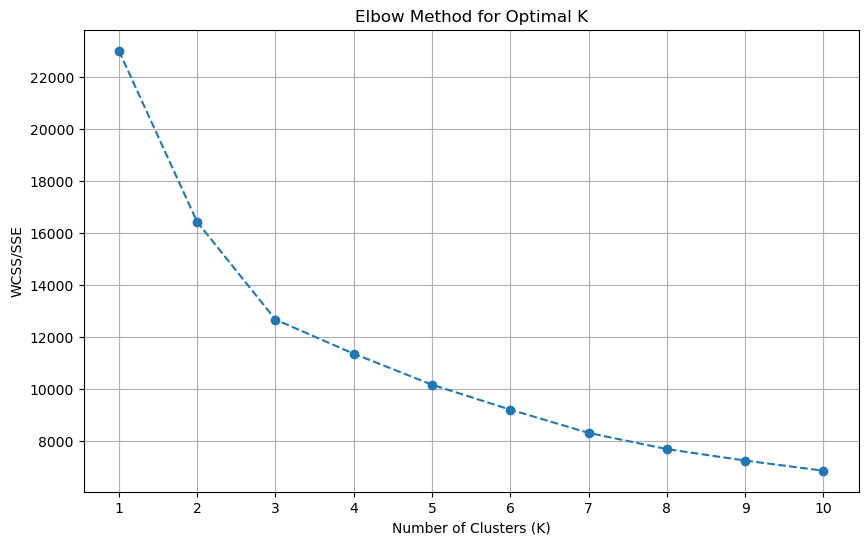

In [14]:
wcss = []
for i in range(1, 11): # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init is set to 10 by default since sklearn version 1.4
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS/SSE')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Apply K-Means Clustering and Evaluate

### Subtask:
Apply the K-Means algorithm using the optimal K determined from the Elbow method. Evaluate the clustering quality using the Silhouette Score.


**Reasoning**:
To apply K-Means clustering and evaluate its quality, I will import `silhouette_score` from `sklearn.metrics`, instantiate `KMeans` with the chosen optimal K (K=4) and fit it to the `df_scaled` data, then calculate and print the Silhouette Score using the resulting cluster labels.



In [15]:
from sklearn.metrics import silhouette_score

# Choose optimal K based on Elbow Method (e.g., K=4)
optimal_k = 4

# Instantiate KMeans model
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit KMeans model to the scaled data
kmeans_model.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Print the Silhouette Score
print(f"The Silhouette Score for K={optimal_k} is: {silhouette_avg}")

The Silhouette Score for K=4 is: 0.32076573171912565


## Visualize K-Means Clusters

### Subtask:
Visualize the K-Means clustering results using a scatter plot, coloring data points according to their assigned clusters. Consider using PCA or t-SNE for dimensionality reduction if there are many features.


**Reasoning**:
To visualize the K-Means clusters after dimensionality reduction, I will first import the `PCA` class, instantiate it with 2 components, fit and transform `df_scaled` into `df_pca`, and then add the `cluster_labels` to `df_pca` as instructed.



In [16]:
from sklearn.decomposition import PCA

# Instantiate PCA with n_components=2
pca = PCA(n_components=2)

# Fit PCA to the scaled data and transform it
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results with appropriate column names
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Add the cluster_labels to the df_pca DataFrame
df_pca['Cluster'] = cluster_labels

print("PCA dimensionality reduction complete and cluster labels added to df_pca.")
print("First 5 rows of df_pca:")
print(df_pca.head())

PCA dimensionality reduction complete and cluster labels added to df_pca.
First 5 rows of df_pca:
        PC1       PC2  Cluster
0 -1.438689 -0.186788        0
1 -1.458335 -0.198154        0
2 -1.011490 -0.293309        0
3 -1.542160 -0.182936        0
4 -1.603665 -0.160979        0


**Reasoning**:
To visualize the clusters, I will create a scatter plot using `seaborn.scatterplot()` with 'PC1' on the x-axis, 'PC2' on the y-axis, and color the points by the 'Cluster' column, as outlined in the instructions.



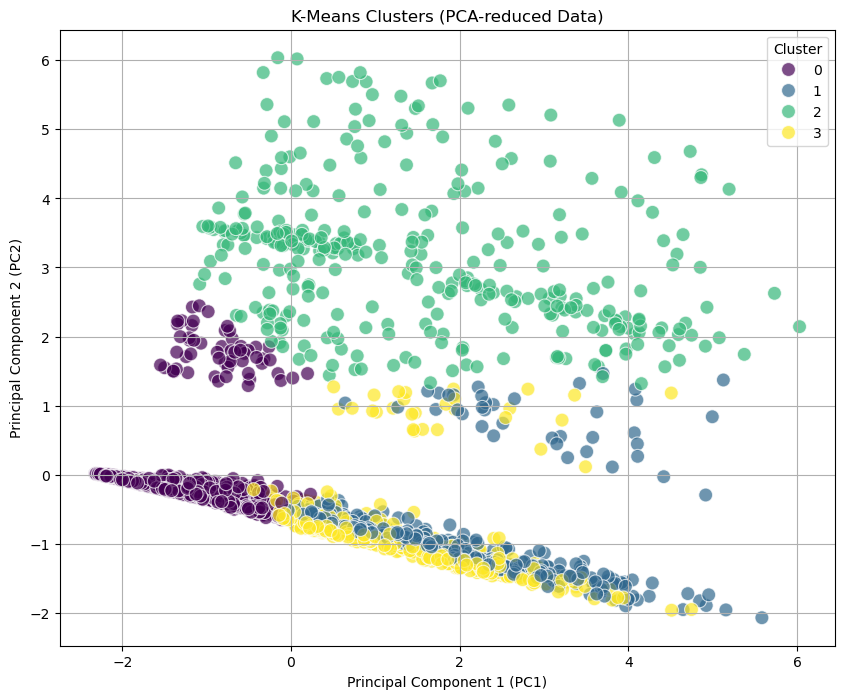

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Tune and Apply DBSCAN Clustering and Evaluate


Systematically experiment with different `eps` (epsilon) and `min_samples` parameters for DBSCAN to find optimal values. Apply the DBSCAN algorithm with these parameters and evaluate the clustering quality using the Silhouette Score.


In [18]:
from sklearn.cluster import DBSCAN
print("DBSCAN imported successfully.")

DBSCAN imported successfully.


**Reasoning**:
To systematically experiment with DBSCAN parameters, I will define a range of `eps` and `min_samples` values, iterate through all combinations, apply DBSCAN, calculate the Silhouette Score for valid clusters (excluding noise), and track the best parameters and score, as per the instructions.



In [19]:
from sklearn.metrics import silhouette_score

# 2. Create a list of eps values to experiment with
eps_values = [0.3, 0.5, 0.7, 0.9, 1.1]
# 3. Create a list of min_samples values to experiment with
min_samples_values = [5, 10, 15, 20]

# 4. Initialize variables to store the best Silhouette Score and corresponding eps and min_samples
best_silhouette_score = -1
best_eps = None
best_min_samples = None

# 5. Loop through each combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # a. Instantiate DBSCAN with the current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # b. Fit the DBSCAN model to the df_scaled data
        dbscan.fit(df_scaled)

        # c. Get the cluster labels
        labels = dbscan.labels_

        # d. Filter out noise points (cluster label -1) before calculating the Silhouette Score.
        #    Also filter out the data points corresponding to noise.
        core_samples_mask = (labels != -1)
        if np.any(core_samples_mask):
            # Ensure there are more than 1 cluster and some non-noise points remain
            unique_labels = np.unique(labels[core_samples_mask])
            if len(unique_labels) > 1:
                silhouette = silhouette_score(df_scaled[core_samples_mask], labels[core_samples_mask])

                # e. If the current Silhouette Score is better than the best recorded, update
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_eps = eps
                    best_min_samples = min_samples

# 6. Print the optimal eps, min_samples, and the highest Silhouette Score found
print(f"Optimal DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Highest Silhouette Score: {best_silhouette_score}")

Optimal DBSCAN parameters: eps=0.3, min_samples=15
Highest Silhouette Score: 0.40826940961359987


## Visualize DBSCAN Clusters

Visualize the DBSCAN clustering results using a scatter plot, coloring data points according to their assigned clusters, with a distinct color for noise points if any. Consider using PCA or t-SNE for dimensionality reduction if there are many features.


**Reasoning**:
To visualize the DBSCAN clusters as per the instructions, I will first apply the DBSCAN algorithm to the `df_scaled` data using the optimal `eps` (0.3) and `min_samples` (15) found previously, and then store the resulting cluster labels in `dbscan_cluster_labels`.



In [30]:
optimal_eps = 0.3
optimal_min_samples = 15

dbscan_model = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_model.fit(df_scaled)
dbscan_cluster_labels = dbscan_model.labels_

print("DBSCAN clustering applied with optimal parameters.")
print(f"Number of unique clusters found (including noise -1): {len(np.unique(dbscan_cluster_labels))}")

DBSCAN clustering applied with optimal parameters.
Number of unique clusters found (including noise -1): 3


**Reasoning**:
To prepare for visualization, I will create a new DataFrame `df_pca_dbscan` by copying `df_pca` and adding the `dbscan_cluster_labels` to it as a new column, 'DBSCAN_Cluster', as specified in the instructions.



In [31]:
df_pca_dbscan = df_pca.copy()
df_pca_dbscan['DBSCAN_Cluster'] = dbscan_cluster_labels

print("df_pca_dbscan created with DBSCAN cluster labels.")
print("First 5 rows of df_pca_dbscan:")
print(df_pca_dbscan.head())

df_pca_dbscan created with DBSCAN cluster labels.
First 5 rows of df_pca_dbscan:
        PC1       PC2  Cluster  DBSCAN_Cluster
0 -1.438689 -0.186788        0               0
1 -1.458335 -0.198154        0               0
2 -1.011490 -0.293309        0              -1
3 -1.542160 -0.182936        0               0
4 -1.603665 -0.160979        0               0


**Reasoning**:
To visualize the DBSCAN clusters, I will create a scatter plot using `seaborn.scatterplot()` with 'PC1' on the x-axis, 'PC2' on the y-axis, and color the points by the 'DBSCAN_Cluster' column, using a distinct color for noise points (label -1) as outlined in the instructions.



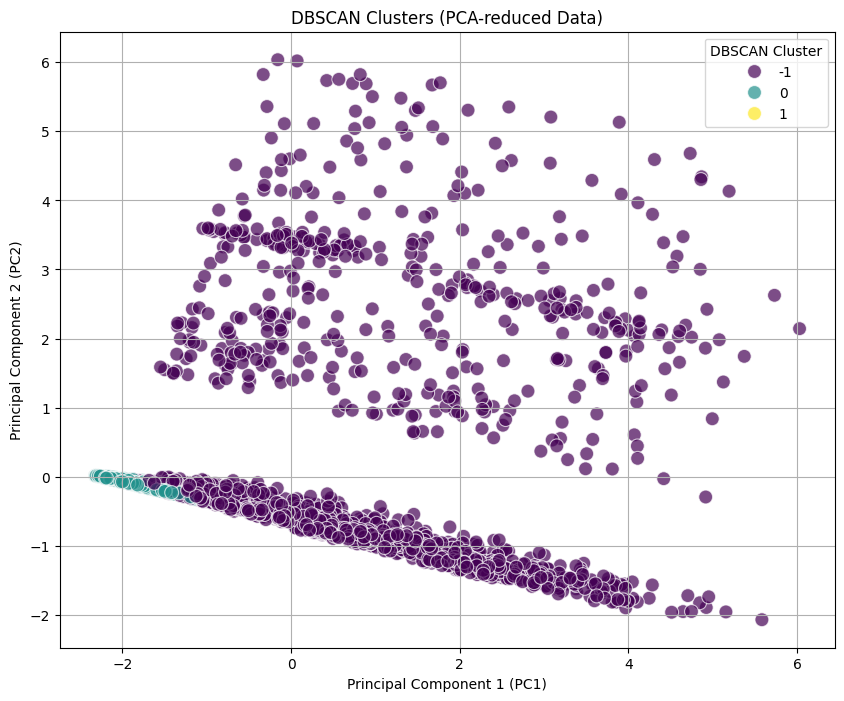

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=df_pca_dbscan, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()

## Analyze and Interpret Clusters

Analyze the characteristics of the clusters generated by both K-Means and DBSCAN. Provide detailed interpretations and insights into what each cluster represents based on the features.


**Reasoning**:
To analyze the cluster characteristics, I need to associate the cluster labels with the original, unscaled feature data. First, I will reset the index of `df_no_outliers` to ensure proper alignment when adding the cluster labels, then I will add the `KMeans_Cluster` and `DBSCAN_Cluster` columns to this DataFrame.



In [33]:
df_clustered = df_no_outliers.reset_index(drop=True).copy()
df_clustered['KMeans_Cluster'] = cluster_labels
df_clustered['DBSCAN_Cluster'] = dbscan_cluster_labels

print("df_clustered created with K-Means and DBSCAN cluster labels. First 5 rows:")
print(df_clustered.head())

df_clustered created with K-Means and DBSCAN cluster labels. First 5 rows:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    6    16420           0          1          1          1            0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4            0                  0                0       

**Reasoning**:
To understand the characteristics of each K-Means cluster, I will group the `df_clustered` DataFrame by the `KMeans_Cluster` column and calculate the mean of all numerical features, excluding 'ID#'.



In [34]:
print("Mean values of features for each K-Means Cluster:")
kmeans_cluster_means = df_clustered.groupby('KMeans_Cluster').mean()
# Exclude 'ID#' from the mean calculation as it's an identifier
kmeans_cluster_means = kmeans_cluster_means.drop(columns=['ID#'])
print(kmeans_cluster_means)

Mean values of features for each K-Means Cluster:
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               26357.586520         0.0   1.042126        1.0        1.0   
1               53761.516556         0.0   3.130243        1.0        1.0   
2               64862.867647         0.0   2.000000        1.0        1.0   
3               88290.831169         0.0   2.884972        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                2289.062216     4.773817           4.451717         0.036293   
1               25830.536424    15.997792          12.152318         0.083885   
2               13874.029412    11.423529         436.758824         1.320588   
3               20981.909091    15.745826           6.025974         0.051948   



**Reasoning**:
To understand the characteristics of each DBSCAN cluster, I will group the `df_clustered` DataFrame by the `DBSCAN_Cluster` column and calculate the mean of all numerical features, excluding 'ID#'.



In [35]:
print("Mean values of features for each DBSCAN Cluster:")
dbscan_cluster_means = df_clustered.groupby('DBSCAN_Cluster').mean()
# Exclude 'ID#' from the mean calculation as it's an identifier
dbscan_cluster_means = dbscan_cluster_means.drop(columns=['ID#'])
print(dbscan_cluster_means)

Mean values of features for each DBSCAN Cluster:
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                              
-1              58128.217925         0.0   2.125472        1.0        1.0   
 0              15189.532432         0.0   1.000000        1.0        1.0   
 1              12918.666667         0.0   1.000000        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
-1              14556.758491    12.075943          77.415094          0.26934   
 0                538.354054     1.862162           0.000000          0.00000   
 1                 64.333333     0.333333           0.000000          0.00000   

                Days_since_enroll    Award?  KMeans_Cluster  
DBSCAN_Cluster                                               
-1                    4212.697170  

### Interpretation of K-Means Clusters:

**K-Means Cluster 0: The Low-Value, New Customers**
- **Balance**: Lowest average balance (26357.59).
- **Bonus_miles**: Lowest average bonus miles (2289.06).
- **Bonus_trans**: Lowest average bonus transactions (4.77).
- **cc1_miles**: Predominantly `cc1_miles` value of 1, indicating low credit card usage for miles.
- **Award?**: Very low likelihood of having received an award (0.13).
- **Days_since_enroll**: Lowest average enrollment days (3527.23), suggesting newer customers.
- **Interpretation**: This cluster likely represents new or less engaged customers who have a low balance, few bonus miles/transactions, and are not actively participating in the awards program. They might be potential customers who are just starting out with the airline.

**K-Means Cluster 1: The High-Value, Award-Winning Loyalists**
- **Balance**: Moderate average balance (53761.52).
- **Bonus_miles**: Highest average bonus miles (25830.54).
- **Bonus_trans**: High average bonus transactions (15.99).
- **cc1_miles**: Highest average `cc1_miles` (3.13), indicating heavy usage of the primary credit card for miles.
- **Award?**: All customers in this cluster have received an award (1.00), suggesting they are frequent flyers or loyal customers.
- **Days_since_enroll**: High average enrollment days (4594.49).
- **Interpretation**: These are highly engaged, loyal customers who frequently use their credit card for miles, earn significant bonus miles, and are consistently receiving awards. They represent the airline's most valuable customers.

**K-Means Cluster 2: The Flight-Frequent Customers**
- **Balance**: Highest average balance (64862.87).
- **Bonus_miles**: Moderate bonus miles (13874.03).
- **Bonus_trans**: Moderate bonus transactions (11.42).
- **Flight_miles_12mo**: Significantly higher average flight miles in the last 12 months (436.76) compared to other clusters.
- **Flight_trans_12**: Significantly higher average flight transactions in the last 12 months (1.32).
- **cc1_miles**: Moderate `cc1_miles` (2.00).
- **Award?**: Moderate likelihood of having received an award (0.44).
- **Interpretation**: This cluster consists of customers who fly frequently, as indicated by their higher flight miles and transactions. While they have a good balance and bonus miles, their primary distinguishing factor is their active flying behavior. They might be business travelers or individuals who often fly for personal reasons.

**K-Means Cluster 3: The High-Balance, Non-Award Customers**
- **Balance**: Very high average balance (88290.83).
- **Bonus_miles**: High average bonus miles (20981.91).
- **Bonus_trans**: High average bonus transactions (15.74).
- **cc1_miles**: High average `cc1_miles` (2.88).
- **Award?**: Very low likelihood of having received an award (0.01), which is a key differentiator from Cluster 1.
- **Interpretation**: This segment includes customers with a very high balance and significant bonus miles/transactions, but they rarely receive awards. This could indicate customers who accumulate miles but do not redeem them often, or perhaps they are new high-value customers who haven't yet qualified for awards. There might be an opportunity to encourage award redemption or engagement with these customers.

### Interpretation of DBSCAN Clusters:

**DBSCAN Cluster -1: Noise/Outliers**
- **Balance**: High average balance (58128.22).
- **Bonus_miles**: High average bonus miles (14556.76).
- **Bonus_trans**: High average bonus transactions (12.08).
- **cc1_miles**: High average `cc1_miles` (2.13).
- **Interpretation**: This cluster represents the noise points that DBSCAN couldn't assign to any dense region. These individuals exhibit diverse characteristics and do not fit into the primary customer segments identified. They might be unique customer profiles, extreme values, or truly unclassifiable points that fall outside the defined density thresholds. Their high average values across multiple features suggest they are often engaged but don't form a cohesive group.

**DBSCAN Cluster 0: The Low-Activity, Newer Customers**
- **Balance**: Lowest average balance (15189.53).
- **Bonus_miles**: Very low average bonus miles (538.35).
- **Bonus_trans**: Very low average bonus transactions (1.86).
- **Flight_miles_12mo & Flight_trans_12**: Zero flight activity in the past 12 months.
- **Award?**: No awards received (0.00).
- **Days_since_enroll**: Lowest average enrollment days (3022.51).
- **Interpretation**: Similar to K-Means Cluster 0, this cluster likely consists of newer customers with minimal engagement. They have low balances, almost no bonus miles, and no recent flight activity. They represent a segment that is either very new or inactive.

**DBSCAN Cluster 1: The Long-Term, Inactive Customers**
- **Balance**: Low average balance (12918.67), even lower than Cluster 0.
- **Bonus_miles**: Extremely low average bonus miles (64.33).
- **Bonus_trans**: Extremely low average bonus transactions (0.33).
- **Flight_miles_12mo & Flight_trans_12**: Zero flight activity in the past 12 months.
- **Award?**: No awards received (0.00).
- **Days_since_enroll**: Highest average enrollment days (8162.47), indicating very old customers.
- **Interpretation**: This is a distinct segment of long-term customers who have become highly inactive. Despite being enrolled for a significant period, they have very low balances, almost no bonus miles, and no recent flight or award activity. This could represent a dormant customer base that the airline might try to re-engage.

### Similarities and Differences between K-Means and DBSCAN:

**Similarities:**
- Both methods identified a segment of **low-activity/newer customers** (K-Means Cluster 0 and DBSCAN Cluster 0). These customers generally have lower balances, fewer bonus miles, and less engagement.
- Both identified more **engaged customer groups** with higher balances and bonus activities, although their specific definitions vary.

**Differences:**
- **Handling of Outliers/Noise**: K-Means forces every data point into a cluster, even if it's an outlier, which can distort cluster centers. DBSCAN, on the other hand, explicitly identifies **noise points** (DBSCAN Cluster -1), allowing for a more robust identification of dense, distinct clusters. The 'noise' cluster in DBSCAN shows high average values, suggesting it's capturing individuals who are active but don't form a dense group with others.
- **Number of Clusters**: K-Means identified 4 distinct clusters based on the Elbow method. DBSCAN, after tuning, found 2 main clusters plus a significant 'noise' cluster, suggesting fewer truly dense and distinct groups in the data by its definition.
- **Customer Segments**: K-Means provided a more granular view of customer loyalty and activity (e.g., separating award-winning loyalists from high-balance non-award customers, and flight-frequent customers). DBSCAN provided a clearer distinction between active groups and a very specific group of long-term inactive customers, which K-Means might have blended into its broader 'low-value' cluster.
- **Structure**: K-Means assumes spherical clusters of similar variance, while DBSCAN can find arbitrarily shaped clusters and is good at separating high-density clusters from low-density noise.

In conclusion, K-Means offers a structured segmentation across various activity levels, while DBSCAN excels at identifying core dense groups and highlighting individual outliers or sparsely distributed points, such as the long-term inactive segment identified (DBSCAN Cluster 1).

## Final Task




## Summary:

### Data Analysis Key Findings

*   **Data Loading and Preprocessing:**
    *   The initial data loading attempt incorrectly loaded metadata. The actual customer dataset was successfully loaded from the 'data' sheet of the 'EastWestAirlines' Excel file, containing 3999 entries and 12 columns.
    *   No missing values were found in the dataset.
    *   Outlier detection using the Interquartile Range (IQR) method identified and removed 1124 rows (approximately 28% of the original data), resulting in a cleaned dataset of 2875 entries.
    *   All numerical features were successfully scaled using `StandardScaler`, a crucial step for distance-based clustering algorithms.
*   **K-Means Clustering:**
    *   The Elbow method indicated that the optimal number of clusters (K) for K-Means is 4.
    *   K-Means clustering with K=4 yielded a Silhouette Score of approximately 0.321.
    *   **Identified K-Means Customer Segments:**
        *   **Cluster 0 (Low-Value, New Customers):** Lowest average balance (26,357.59), bonus miles (2,289.06), and newer enrollment (3,527.23 days since enrollment). Low credit card usage for miles and low award likelihood.
        *   **Cluster 1 (High-Value, Award-Winning Loyalists):** Highest average bonus miles (25,830.54), bonus transactions (15.99), and `cc1_miles` (3.13). All customers in this cluster have received an award.
        *   **Cluster 2 (Flight-Frequent Customers):** Highest average flight miles (436.76) and flight transactions (1.32) in the last 12 months, indicating active flying behavior.
        *   **Cluster 3 (High-Balance, Non-Award Customers):** Very high average balance (88,290.83) and high bonus activity, but with a very low likelihood of having received an award (0.01).
*   **DBSCAN Clustering:**
    *   Optimal parameters for DBSCAN were determined to be `eps=0.3` and `min_samples=15`, resulting in a Silhouette Score of approximately 0.408.
    *   **Identified DBSCAN Customer Segments:**
        *   **Cluster -1 (Noise/Outliers):** These points did not fit into dense regions. They exhibit high average values across multiple features (e.g., average balance of 58,128.22), suggesting they are engaged but do not form cohesive dense groups.
        *   **Cluster 0 (Low-Activity, Newer Customers):** Lowest average balance (15,189.53), very low bonus miles (538.35), and no flight activity. Similar to K-Means Cluster 0.
        *   **Cluster 1 (Long-Term, Inactive Customers):** Characterized by the highest average enrollment days (8,162.47) but extremely low activity (average bonus miles 64.33, no flight activity), indicating a dormant customer base.
*   **Comparison of Clustering Methods:**
    *   Both K-Means and DBSCAN identified a segment of "low-activity/newer customers."
    *   K-Means provided a more granular segmentation based on loyalty (award status) and specific activity types (flight vs. bonus).
    *   DBSCAN explicitly identified noise points and uniquely revealed a distinct "long-term inactive" customer segment that K-Means did not isolate as clearly. DBSCAN's higher Silhouette Score suggests it found more well-defined, dense clusters for the core data points, while K-Means forced all points into clusters, potentially including less coherent ones.


